In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation, rc
from IPython.display import HTML

In [8]:
# initialization function: plot the background of each frame
def animate_trajectory(filename):
    fig, ax = plt.subplots()
    ax.set_xlim((-10, 10))
    ax.set_ylim((-5, 5))

    line, = ax.plot([], [],  lw=2, color='red')
    line2, = ax.plot([], [], lw=2, color='blue')
    x0, y0, x1, y1 = [], [], [], []

    df = pd.read_csv(filename)
    x_0 = df['x0'].to_numpy().tolist()
    y_0 = df['y0'].to_numpy().tolist()
    x_1 = df['x1'].to_numpy().tolist()
    y_1 = df['y1'].to_numpy().tolist()
    x0, y0, x1, y1 = [], [], [], []
    # First set up the figure, the axis, and the plot element we want to animate

    def init():
        line.set_data([], [])
        return (line,)

    # animation function. This is called sequentially
    def animate(i):
        x0.append((x_0[i]))
        y0.append((y_0[i]))
        x1.append((x_1[i]))
        y1.append((y_1[i]))
        line.set_data(x0, y0)
        line2.set_data(x1,y1)
        return (line, line2, )

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                    frames=len(df), interval=20, blit=True)

    return anim

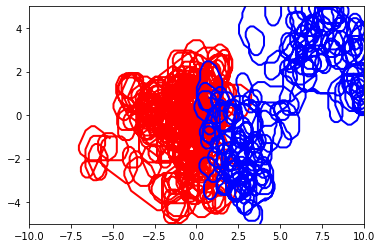

In [9]:
anim_first_learn = animate_trajectory("random_trajectory.csv")
HTML(anim_first_learn.to_html5_video())

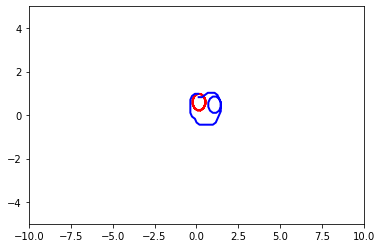

In [10]:
anim_p = animate_trajectory("trajectories/pursuer_trajectory96.csv")
HTML(anim_p.to_html5_video())

In [ ]:
anim_p = animate_trajectory("trajectories/pursuer_trajectory70.csv")
HTML(anim_p.to_html5_video())